In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [12]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, 100)

# 管道机制实现了对全部步骤的流式化封装和管理
'''
degree : int, default=2
        The degree of the polynomial features.
'''
poly_reg = Pipeline(
    [("poly", PolynomialFeatures(degree=2)),  # 由二元tuple构成的list组成
     ("std_scaler", StandardScaler()),
     ("lin_reg", LinearRegression())])

In [13]:
poly_reg.fit(X, y)  # 使用的是第三项("lin_reg", LinearRegression())的fit方法
y_predict = poly_reg.predict(X)  # 使用的是第三项("lin_reg", LinearRegression())的predict方法

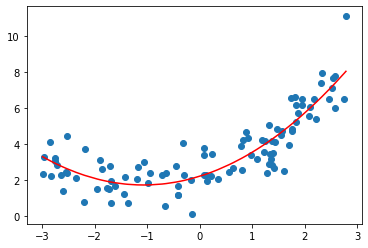

In [14]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()

In [15]:
# 具体步骤所具有的相应方法
poly_reg[0].get_feature_names()

['1', 'x0', 'x0^2']

In [16]:
poly_reg[1].mean_  # 训练数据集的均值

array([1.        , 0.12038405, 2.95502061])

In [17]:
poly_reg[1].scale_  # 训练数据集的方差

array([1.        , 1.71479687, 2.51275685])

In [18]:
poly_reg[2].coef_  # 解释变量(项)的系数

array([0.        , 1.56447985, 1.07099118])

In [19]:
poly_reg[2].intercept_  # 截距项

3.568459319858962